In [1]:
import ROOT
from ROOT import *

import os

Welcome to JupyROOT 6.26/04


In [2]:
filelist=os.listdir('./')

myFiles=[files for files in filelist if '_v1_' in files]
sorted_myFiles = sorted(myFiles)
sorted_myFiles

['VLL2017_bTagEff_May18_v1_DYJetsToLL_M10to50_sample.root',
 'VLL2017_bTagEff_May18_v1_DYJetsToLL_M50_sample.root',
 'VLL2017_bTagEff_May18_v1_HTbinnedWJets_100to200_sample.root',
 'VLL2017_bTagEff_May18_v1_HTbinnedWJets_1200to2500_sample.root',
 'VLL2017_bTagEff_May18_v1_HTbinnedWJets_200to400_sample.root',
 'VLL2017_bTagEff_May18_v1_HTbinnedWJets_2500toInf_sample.root',
 'VLL2017_bTagEff_May18_v1_HTbinnedWJets_400to600_sample.root',
 'VLL2017_bTagEff_May18_v1_HTbinnedWJets_600to800_sample.root',
 'VLL2017_bTagEff_May18_v1_HTbinnedWJets_70to100_sample.root',
 'VLL2017_bTagEff_May18_v1_HTbinnedWJets_800to1200_sample.root',
 'VLL2017_bTagEff_May18_v1_HTbinnedWJets_Inclusive_sample.root',
 'VLL2017_bTagEff_May18_v1_QCD_MuEnriched_120to170_sample.root',
 'VLL2017_bTagEff_May18_v1_QCD_MuEnriched_15to20_sample.root',
 'VLL2017_bTagEff_May18_v1_QCD_MuEnriched_170to300_sample.root',
 'VLL2017_bTagEff_May18_v1_QCD_MuEnriched_20to30_sample.root',
 'VLL2017_bTagEff_May18_v1_QCD_MuEnriched_300to4

In [3]:
myFiles[0].split('_sample')[0].split('_v1_')[1]


'ZZ_ZZTo2Q2Nu'

In [4]:
def printbEff(fname,cName):
    
    #Read
    file=TFile.Open(fname,'READ')
    
    #Read Histo
    den = 'LightJet_PtEta'
    num = 'LightJet_Mis_PtEta'
    
    num_histo= file.Get(num)
    den_histo= file.Get(den)

    eff_histo=num_histo.Clone()
    eff_histo.Divide(den_histo)
    
    
    titlelabel=fname.split('_sample')[0].split('_v1_')[1]
    canvas=TCanvas(cName,"",800,600)
    gStyle.SetOptStat(0)
    eff_histo.GetZaxis().SetRangeUser(0.0,1.0)
    canvas.SetLogx(1)
    eff_histo.Draw('colz text same')
    eff_histo.SetTitle('LightJetEff_'+titlelabel)
    canvas.Draw()
    #canvas.SaveAs(f'bJetEff_{titlelabel}.png')
    
    
    
    ##printarray
    
    print('For the sample '+ titlelabel+'\n')
    bjeteffarray=[]
    for i in range(1,4):
        foreacheta=[]
        for j in range(2,10):
            #print(f'{i}{j}')
            value= eff_histo.GetBinContent(j,i)
            foreacheta.append(value)
        bjeteffarray.append(foreacheta)
    bjeteffarray

    return canvas,bjeteffarray

In [5]:
sortlabel=['DYJetsToLL','QCD_MuEnriched','SingleTop','TTBar','WW','WZ','ZZ','HTbinnedWJets','VLL_M']

For the sample DYJetsToLL_M50

{{0.02328208088874817, 0.012331546284258366, 0.008960423059761524, 0.007308872416615486, 0.007588829379528761, 0.009109965525567532, 0.01758616790175438, 0.04550691321492195}, {0.025287171825766563, 0.014019995927810669, 0.010759021155536175, 0.009622571989893913, 0.00988522544503212, 0.01359971147030592, 0.023553894832730293, 0.055203620344400406}, {0.033331248909235, 0.018699059262871742, 0.014738776721060276, 0.014333573170006275, 0.016090955585241318, 0.021662350744009018, 0.034807831048965454, 0.11061947047710419}}




For the sample DYJetsToLL_M10to50

{{0.018086964264512062, 0.0075373779982328415, 0.0063775512389838696, 0.005958292167633772, 0.006607929710298777, 0.010835913009941578, 0.013888888992369175, 0.0714285746216774}, {0.018365835770964622, 0.009211244992911816, 0.008511672727763653, 0.008584879338741302, 0.007184846326708794, 0.012345679104328156, 0.04188481718301773, 0.0}, {0.030470550060272217, 0.016877636313438416, 0.014106313697993755

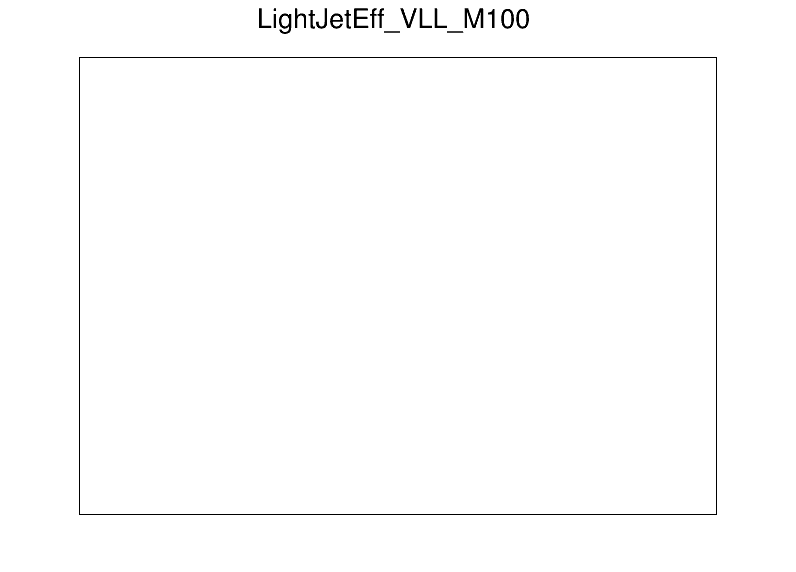

In [6]:
for bkg in sortlabel:
    for index, fname_ in enumerate(myFiles):
        if(bkg in fname_):
            canvas,effarray = printbEff(fname_,'can'+str(index))
            carray=str(effarray).replace('[','{').replace(']','}')
            print(carray)
            print('\n\n\n')